In [30]:
import numpy as np
import matplotlib.pyplot as plt
import random

random.seed(0)
%matplotlib inline

In [31]:
def load_data_from_file(filename='data/advertising.csv'):
    data = np.genfromtxt(filename, dtype=None, delimiter=',', skip_header=1)
    X = data[:, :3]
    y = data[:, 3]

    X = np.hstack([np.ones((X.shape[0], 1)), X])
    return X, y

In [32]:
X, y = load_data_from_file()
print(X[:5, :])
print(y.shape)

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]
(200,)


In [33]:
def generate_random_value(bound=10):
    return (random.random() - 0.5) * 2 * bound
    
    
def create_individual(n=4, bound=10):
    individual = [generate_random_value() for _ in range(n)]
    return individual
    
individual = create_individual()
print(individual)

[6.888437030500962, 5.1590880588060495, -1.5885683833831, -4.821664994140733]


In [34]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = X.dot(theta)
    loss = np.multiply((y_hat - y), (y_hat - y)).mean()
    return loss

def compute_fitness(individual):
    loss = compute_loss(individual)
    return 1 / (1 + loss)

In [35]:
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
fitness_score

np.float64(1.0185991537088997e-06)

In [36]:
def crossover(individual1, individual2, crossover_rate=0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]
    return individual1_new, individual2_new
    
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
individual1, individual2 = crossover (individual1, individual2, 2.0)
print ("individual1: ", individual1)
print ("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [37]:
def mutate(individual, mutation_rate=0.05):
    individual_new = individual.copy()
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            individual_new[i] = generate_random_value()
    return individual_new

before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate (individual, mutation_rate=2.0)
print (before_individual == after_individual)

False


In [38]:
def initialize_population(m):
    return [create_individual() for _ in range(m)]

def selection(sorted_old_population, m=100):
    index1 = random.randint(0, m - 1)
    while True:
        index2 = random.randint(0, m - 1)
        if index2 != index1:
            break
    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]
    return individual_s

def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen % 1 == 0:
        print('Best loss: ', compute_loss(sorted_population[m - 1]), ' with chromosome: ', sorted_population[m - 1])
    
    new_population = []
    while len(new_population) < m - elitism:
        # Selection
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # Crossover
        individual1, individual2 = crossover(individual1, individual2)

        # Muatation
        individual1 = mutate(individual1)
        individual2 = mutate(individual2)

        new_population.append(individual1)
        new_population.append(individual2)

    for ind in sorted_population[m - elitism:]:
        new_population.append(ind.copy())
    
    return new_population, compute_loss(sorted_population[m - 1])

In [39]:
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism =2, gen =1)

Best loss:  123415.051528805  with chromosome:  [3.44, 2.57, -0.79, -2.41]


In [40]:
def run_GA():
    n_generations = 100
    m = 600
    X, y = load_data_from_file()
    population = initialize_population(m)
    losses = []
    for i in range(n_generations):
        population, loss = create_new_population(population, elitism=2, gen=i)
        losses.append(loss)
    return losses, population

Best loss:  2080.7283761466265  with chromosome:  [6.663201675936612, -0.1944007648837287, 2.899751125885668, -0.5464249453981296]
Best loss:  1999.8599325673872  with chromosome:  [3.3025119342233955, -0.1944007648837287, 2.899751125885668, -0.5464249453981296]
Best loss:  1260.8754412948138  with chromosome:  [-0.5674916980742406, 0.049268467011771566, 1.3822547904856042, 0.1720026012526632]
Best loss:  840.4538647664631  with chromosome:  [4.127635923331782, -0.21208430298341296, 0.9149681067898507, 0.37364430841929197]
Best loss:  840.4538647664631  with chromosome:  [4.127635923331782, -0.21208430298341296, 0.9149681067898507, 0.37364430841929197]
Best loss:  840.4538647664631  with chromosome:  [4.127635923331782, -0.21208430298341296, 0.9149681067898507, 0.37364430841929197]
Best loss:  489.6423762350177  with chromosome:  [-9.600122651741302, 0.04444365370356307, 0.9149681067898507, 0.37364430841929197]
Best loss:  121.16581227278759  with chromosome:  [-0.5674916980742406, 0.0

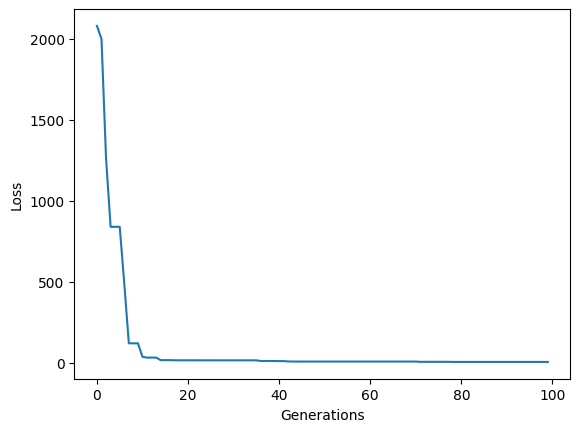

In [41]:
def visualize_loss(losses):
    plt.plot(losses)
    plt.xlabel('Generations')
    plt.ylabel('Loss')
    plt.show()

losses, population = run_GA()
visualize_loss(losses)

[3.095721212860365, 0.049268467011771566, 0.0875622864593617, 0.08918141709940874]


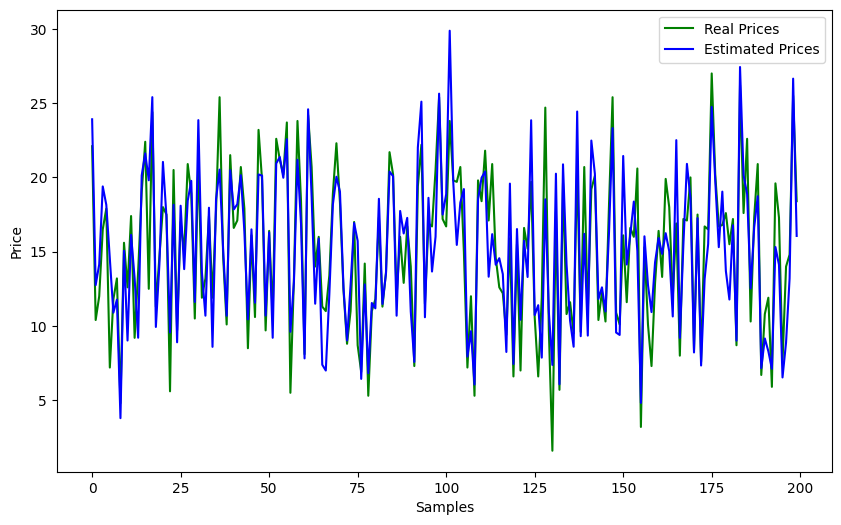

In [42]:
def visualize_pred_gt():
    sorted_population = sorted(population, key=compute_fitness)
    print(sorted_population[-1])
    theta = np.array(sorted_population[-1])

    prices_pred = []
    for feature in X:
        price_pred = sum(c * x for x, c in zip(feature, theta))
        prices_pred.append(price_pred)

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.xlabel('Samples')
    plt.ylabel('Price')
    plt.plot(y, c='g', label='Real Prices')
    plt.plot(prices_pred, c='b', label='Estimated Prices')
    plt.legend()
    plt.show()
visualize_pred_gt()
        